Importing Libraries

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory


Connecting to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/MyDrive/Dataset'

In [4]:
Train_Dir = os.path.join(dataset_path, 'Training')
Test_Dir = os.path.join(dataset_path, 'Testing')

In [5]:
# Load training dataset with categorical labels
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=Train_Dir,
    labels='inferred',
    label_mode='categorical',  # One-hot encoded labels
    image_size=(225,225),
    batch_size=32,
    seed=123,
    validation_split=0.2,
    subset='training',
    color_mode = 'grayscale'
)

# Load test dataset with categorical labels
test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=Test_Dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(225,225),
    batch_size= 32,
    seed=123,
    color_mode = 'grayscale'

)
val_dataset = train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=Train_Dir,
    labels='inferred',
    label_mode='categorical',  # One-hot encoded labels
    image_size=(225,225),
    batch_size=32,
    seed=123,
    validation_split=0.2,
    subset='validation',
    color_mode = 'grayscale'
)



Found 5752 files belonging to 4 classes.
Using 4602 files for training.
Found 1321 files belonging to 4 classes.
Found 5752 files belonging to 4 classes.
Using 1150 files for validation.


In [ ]:
Visualizing the shape of images and labels

In [6]:
for images, labels in train_dataset.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    print(f"First label: {labels[0]}")  # Should look like [1. 0. 0. 0.]
    break


Image batch shape: (32, 225, 225, 1)
Label batch shape: (32, 4)
First label: [0. 0. 1. 0.]


Data Augmentation

In [7]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomContrast(0.1),
    ]
)

Visualizing images after data Augmentation

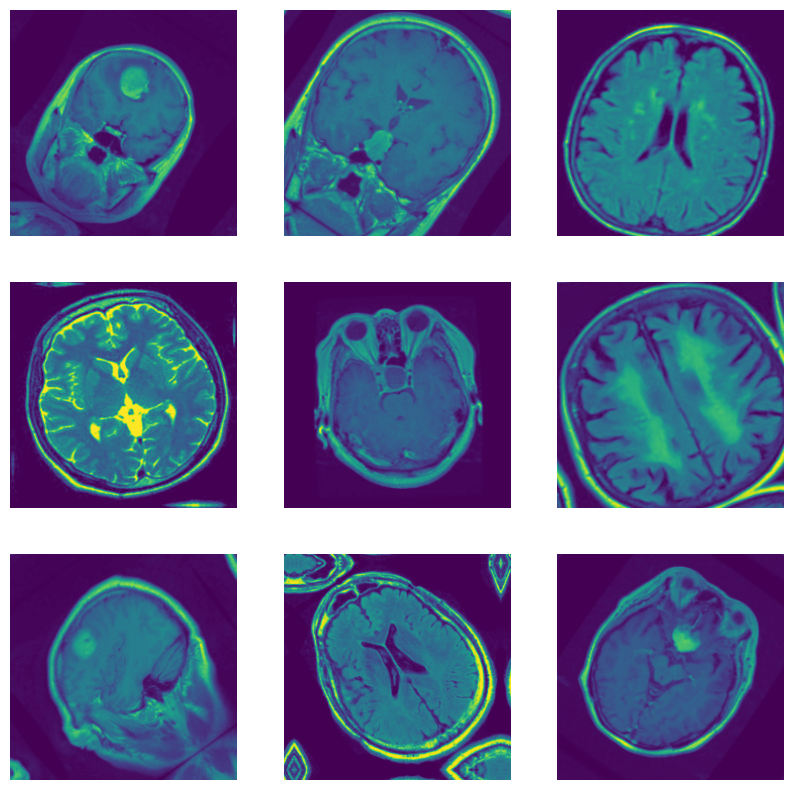

In [19]:
for images, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        augmented_image = data_augmentation(images[i])
        plt.subplot(3, 3, i+1)
        plt.imshow(augmented_image.numpy().astype("uint8"))
        plt.axis('off')
    plt.show()
    break

Model

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(225,225,1)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, (3,3), activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(256, activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(4, activation='softmax')
])


In [10]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 225, 225, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 225, 225, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 223, 223, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 223, 223, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 223, 223, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 44,531,844 (169.88 MB)

 Trainable params: 44,529,860 (169.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
Training Model

In [12]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30
)

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.6085 - loss: 1.0394 - val_accuracy: 0.2052 - val_loss: 1.7319
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 225ms/step - accuracy: 0.7604 - loss: 0.6034 - val_accuracy: 0.3009 - val_loss: 1.9077
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.7841 - loss: 0.5302 - val_accuracy: 0.2609 - val_loss: 2.0115
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 292ms/step - accuracy: 0.8353 - loss: 0.4587 - val_accuracy: 0.2609 - val_loss: 2.0916
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.8627 - loss: 0.3710 - val_accuracy: 0.2609 - val_loss: 2.5272
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 283ms/step - accuracy: 0.8544 - loss: 0.3894 - val_accuracy: 0.2609 - val_loss: 2.6397
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.8703 - loss: 0.3463 - val_accuracy: 0.2609 - val_loss: 2.4471
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 292ms/step - accuracy: 0.9099 - loss: 0.2823 - val_accuracy

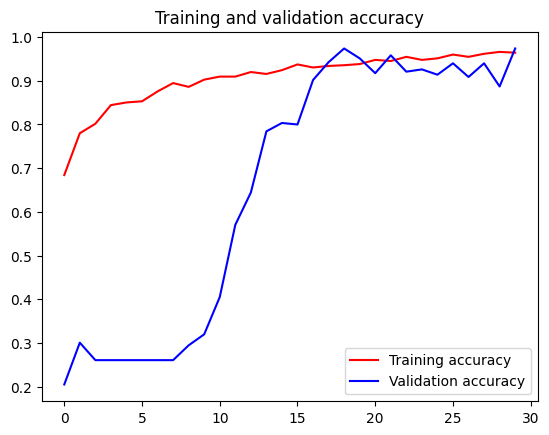

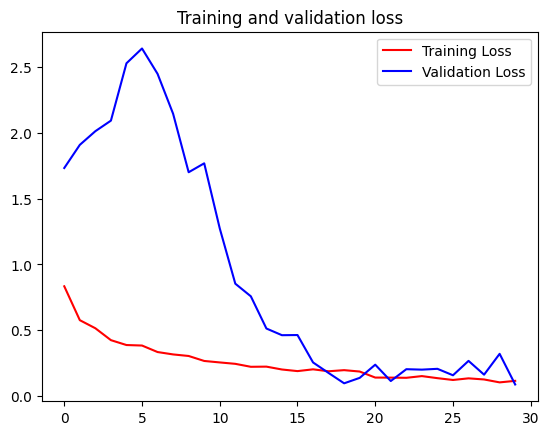

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
Testing Accuracy

In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset)

42/42 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.8474 - loss: 0.5111


Saving the model

In [15]:
model.save("Brain_Tumor_Classification_model.h5")


In [20]:
!tensorflowjs_converter --input_format=keras Brain_Tumor_Classification_model.h5 Brain_Tumor_Classification_model_js


2025-02-18 20:44:56.036926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739911496.059617   15223 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739911496.065929   15223 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [22]:
import shutil
shutil.make_archive("Brain_Tumor_Classification_model_js", 'zip', "Brain_Tumor_Classification_model_js")

from google.colab import files
files.download("Brain_Tumor_Classification_model_js.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>